<a href="https://colab.research.google.com/github/Raman-Dhillon/Wine-Quality-Prediction/blob/main/redwinequality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

from warnings import filterwarnings
filterwarnings(action='ignore')

In [ ]:
wine = pd.read_csv("/content/winequality-red.csv")
wine.sample(25)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
678,8.3,0.780,0.10,2.6,0.081,45.0,87.0,0.99830,3.48,0.53,10.0,5
1193,6.4,0.885,0.00,2.3,0.166,6.0,12.0,0.99551,3.56,0.51,10.8,5
1256,7.5,0.590,0.22,1.8,0.082,43.0,60.0,0.99499,3.10,0.42,9.2,5
415,8.6,0.725,0.24,6.6,0.117,31.0,134.0,1.00140,3.32,1.07,9.3,5
189,7.9,0.490,0.32,1.9,0.082,17.0,144.0,0.99680,3.20,0.55,9.5,5
1367,6.9,0.540,0.30,2.2,0.088,9.0,105.0,0.99725,3.25,1.18,10.5,6
598,8.5,0.585,0.18,2.1,0.078,5.0,30.0,0.99670,3.20,0.48,9.8,6
1451,7.8,0.320,0.44,2.7,0.104,8.0,17.0,0.99732,3.33,0.78,11.0,7
1335,6.6,0.580,0.02,2.4,0.069,19.0,40.0,0.99387,3.38,0.66,12.6,6
1266,7.2,0.570,0.05,2.3,0.081,16.0,36.0,0.99564,3.38,0.60,10.3,6


**Dataset Information**

In [ ]:
wine.info()
wine.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


**Exploratory Data Analysis (EDA)**

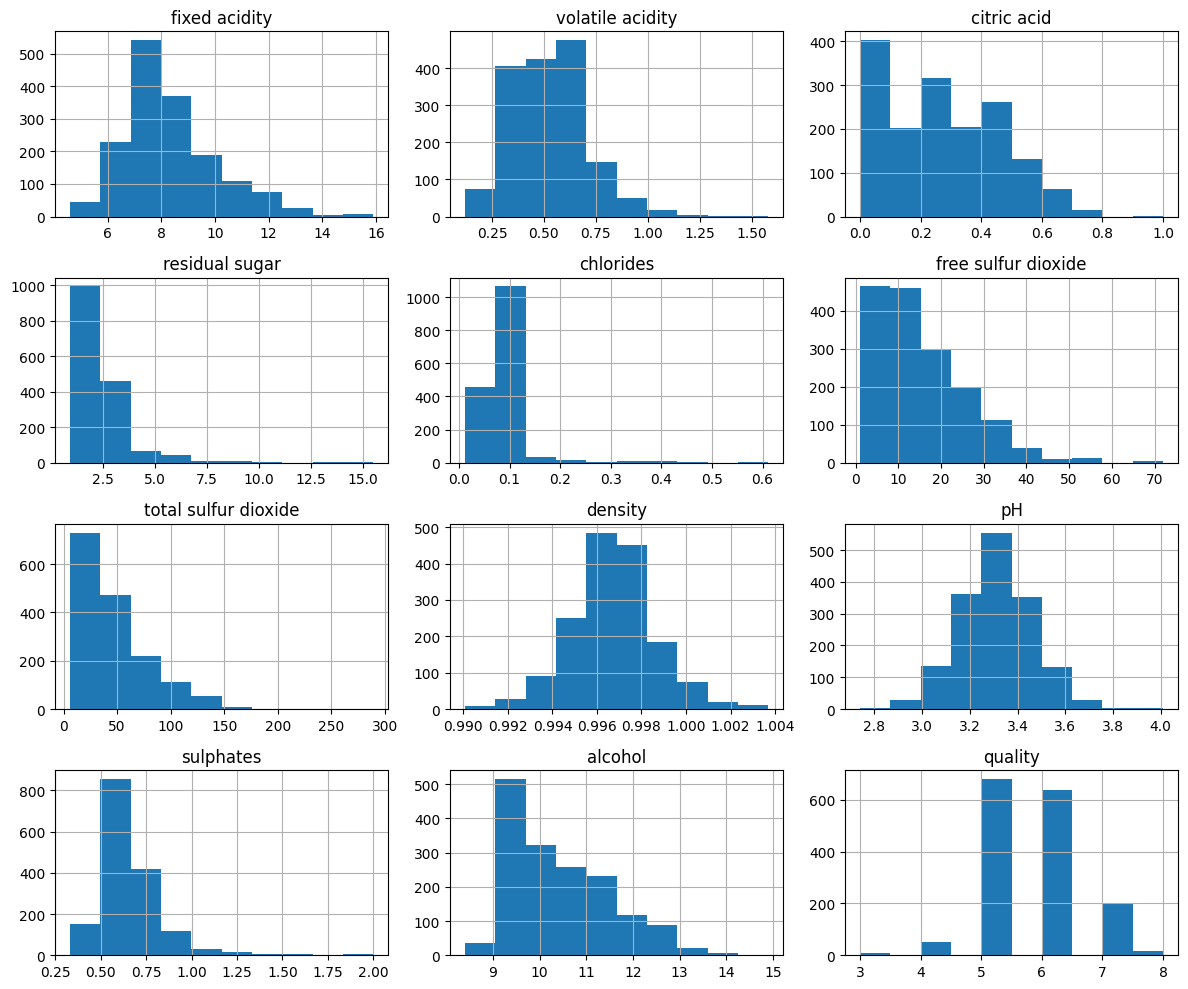

In [ ]:
wine.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

**Feature Correlation Matrix**

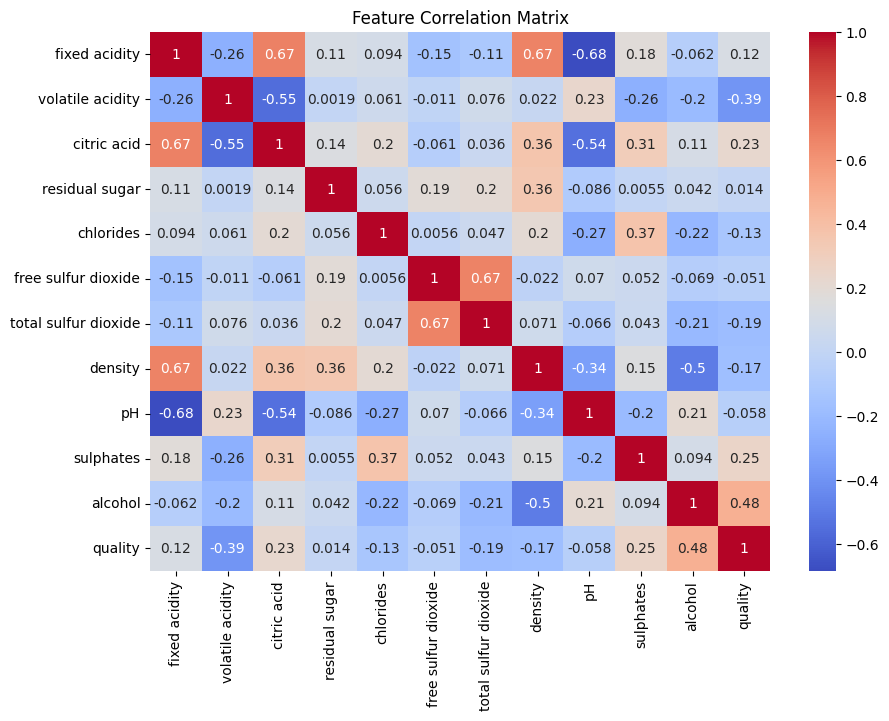

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(wine.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

**Convert Target Variable**

In [ ]:
wine["quality"] = wine["quality"].apply(lambda x: 1 if x >= 7 else 0)
wine["quality"].value_counts()


,count
quality,
0,1382
1,217


**Split Features and Target**

In [ ]:
X = wine.drop("quality", axis=1)
y = wine["quality"]

**Train-Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**Feature Scaling**

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Train Multiple Models**

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    results[name] = acc

In [ ]:
results

{'Logistic Regression': 0.865625,
 'KNN': 0.88125,
 'SVM': 0.875,
 'Decision Tree': 0.890625,
 'Random Forest': 0.89375}

**Select Best Model**

In [ ]:
best_model_name = max(results, key=results.get)
best_model_name

'Random Forest'

**Model Evaluation**

In [ ]:
best_model = models[best_model_name]
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [ ]:
print("Best Model:", best_model_name)
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Best Model: Random Forest
Accuracy: 0.90625

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       273
           1       0.74      0.55      0.63        47

    accuracy                           0.91       320
   macro avg       0.83      0.76      0.79       320
weighted avg       0.90      0.91      0.90       320



**Confusion Matrix**

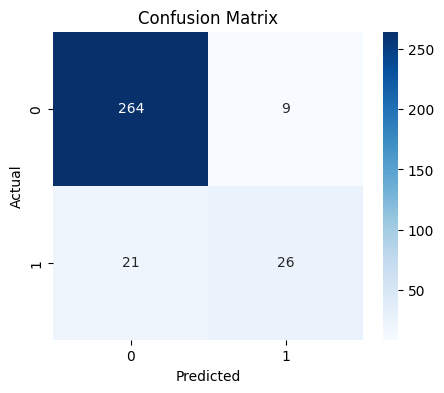

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Feature Importance (Random Forest Only)**

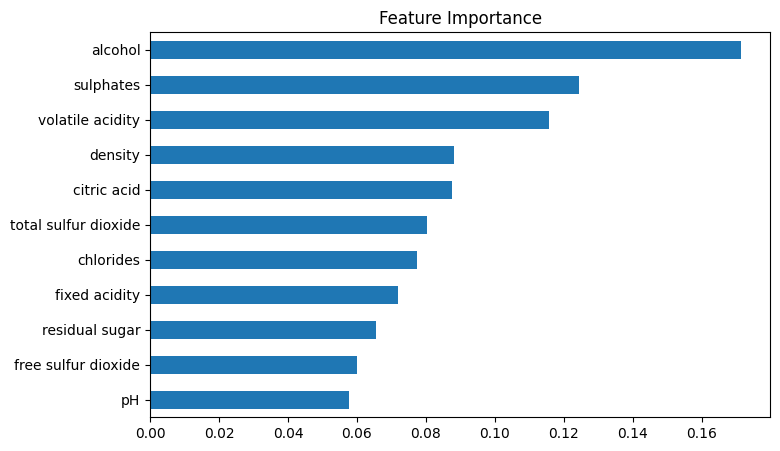

In [ ]:
if best_model_name == "Random Forest":
    importances = best_model.feature_importances_
    feature_names = X.columns

    feat_imp = pd.Series(importances, index=feature_names)
    feat_imp.sort_values().plot(kind="barh", figsize=(8,5))
    plt.title("Feature Importance")
    plt.show()

**Save Model**

In [ ]:
import joblib
joblib.dump(best_model, "wine_quality_model.pkl")

['wine_quality_model.pkl']